In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [7]:
%time train_df = pd.read_csv('train.csv', 
                             nrows = 1000000, 
                             na_filter=False, 
                             parse_dates=['pickup_datetime'])
copy_train_df = train_df.copy()
train_df.head()

<string>:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 3min 21s, sys: 2.1 s, total: 3min 23s
Wall time: 3min 27s


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.8416,40.7123,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.9793,40.782,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.9912,40.7506,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.9916,40.7581,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.9567,40.7838,1


In [8]:
# Check for missing values in the dataset
train_df = train_df.dropna()
train_df.isnull().values.any()

False

In [9]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,1.684924
std,9.822090,12.057937,7.626154,1.323911
min,-44.900000,-3377.680935,-3116.285383,0.000000
25%,6.000000,-73.992060,40.734965,1.000000
50%,8.500000,-73.981792,40.752695,1.000000
75%,12.500000,-73.967094,40.767154,2.000000
max,500.000000,2522.271325,2621.628430,208.000000


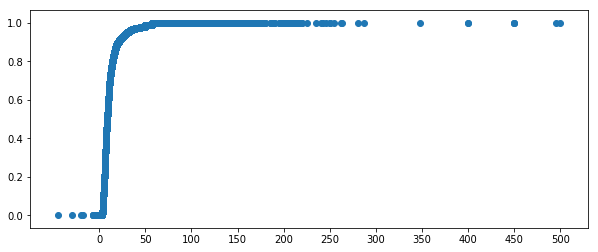

In [10]:
x = train_df.fare_amount.sort_values()
y = np.arange(1, len(x) + 1, 1) / len(x)
plt.figure(figsize = (10, 4))
plt.xticks(np.arange(0, 501, 50))
plt.scatter(x, y)
plt.show()

From the describe function and the scatter plot we can observe that there are negative fare_amount, which might be errors in data collection. fare_amount greater than 250 might be out of city drop off or outliers.

In [7]:
train_df = train_df[train_df.fare_amount.between(2, 250)]

In [8]:
train_df.fare_amount.describe()

count    999909.000000
mean         11.344249
std           9.726574
min           2.500000
25%           6.000000
50%           8.500000
75%          12.500000
max         250.000000
Name: fare_amount, dtype: float64

Max passenger_count is 208, which is an outlier and better to be removed.

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999909 entries, 0 to 999999
Data columns (total 8 columns):
key                  999909 non-null object
fare_amount          999909 non-null float64
pickup_datetime      999909 non-null datetime64[ns, UTC]
pickup_longitude     999909 non-null float64
pickup_latitude      999909 non-null float64
dropoff_longitude    999909 non-null object
dropoff_latitude     999909 non-null object
passenger_count      999909 non-null int64
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(3)
memory usage: 68.7+ MB


dropoff_longitude and dropoff_latitude are objects instead of floats
When I try to convert them to floats I get
ValueError: could not convert string to float

In [10]:
for i in train_df.dropoff_longitude:
    try:
        i = float(i)
    except ValueError:
        print('i: ', i)
        
train_df[train_df.dropoff_longitude == ''][:5]

i:  
i:  
i:  
i:  
i:  
i:  
i:  
i:  
i:  
i:  


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
120227,2012-12-11 12:57:00.00000013,12.5,2012-12-11 12:57:00+00:00,-73.992760,40.743098,,,0
245696,2013-03-21 18:07:07.0000001,86.5,2013-03-21 18:07:07+00:00,-73.991572,40.740591,,,0
340533,2012-12-11 12:50:52.00000010,27.5,2012-12-11 12:50:52+00:00,-73.979639,40.784742,,,0
428108,2011-09-08 09:12:52.0000001,11.8,2011-09-08 09:12:52+00:00,-73.987041,40.751542,,,0
471472,2012-12-11 12:34:20.0000006,7.8,2012-12-11 12:34:20+00:00,0.000000,0.000000,,,0


In [11]:
train_df = train_df[train_df.passenger_count.between(1,10)]

In [12]:
train_df.dropoff_longitude = train_df.dropoff_longitude.astype(float)
train_df.dropoff_latitude = train_df.dropoff_latitude.astype(float)

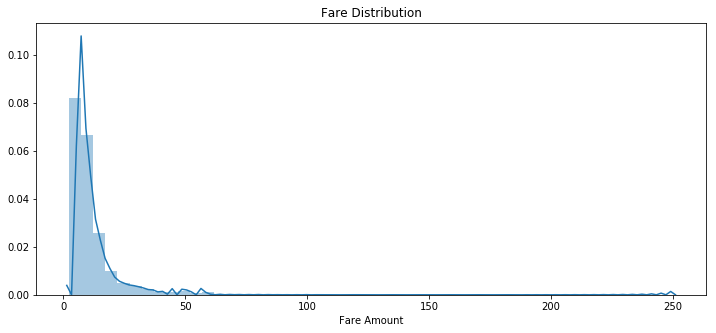

In [13]:
plt.figure(figsize = (12, 5))
sns.distplot(train_df.fare_amount, axlabel='Fare Amount');
plt.title('Fare Distribution');

The correlation between passenger_count and fare_amount is very small/weak,
thus we can remove passenger_count from our model

In [14]:
np.corrcoef(train_df.passenger_count, train_df.fare_amount)

array([[1.        , 0.01227599],
       [0.01227599, 1.        ]])

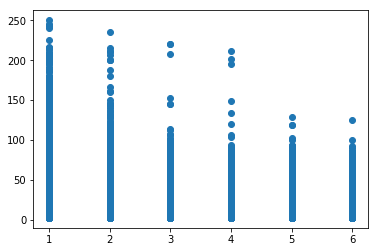

In [15]:
plt.scatter(train_df.passenger_count, train_df.fare_amount)
plt.show()

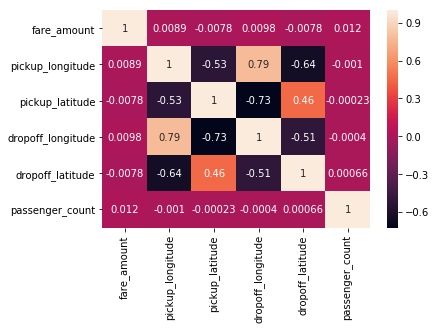

In [24]:
sns.heatmap(train_df.corr(), annot=True)

In [17]:
x2 = train_df.fare_amount.rank(pct=True)

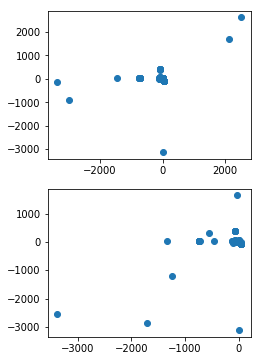

In [18]:
fig = plt.figure(figsize=(8, 6))
fig.add_subplot(221)
plt.scatter(train_df.pickup_longitude, train_df.pickup_latitude)
fig.add_subplot(223)
plt.scatter(train_df.dropoff_longitude, train_df.dropoff_latitude)

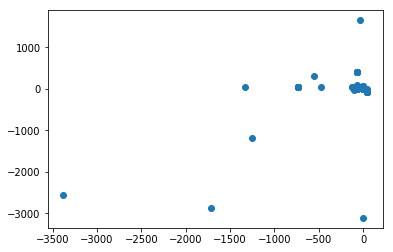

In [19]:
plt.scatter(train_df.dropoff_longitude, train_df.dropoff_latitude)